In [2]:
import pandas as pd

In [6]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data[solar_data['cum_power']==-1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [18]:
solar_data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [13]:
solar_data['cum_power'].mean()

23775.573795180724

In [26]:
solar_df=solar_data.copy()

In [27]:
solar_df[solar_df['cum_power']==-1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [28]:
for i in solar_df['cum_power'].index:
    if solar_df['cum_power'][i]==-1:
      solar_df['cum_power'][i]=((solar_df['cum_power'][i-1]+solar_df['cum_power'][i+1])/2)
    else:
      continue

C:\Users\kuzin\AppData\Local\Temp\ipykernel_44044\3912404112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['cum_power'][i]=((solar_df['cum_power'][i-1]+solar_df['cum_power'][i+1])/2)


In [29]:
solar_df[solar_df['cum_power']==-1]

,date,cum_power


In [30]:
solar_df

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [32]:
solar_df['day_power']=solar_df['cum_power'].diff()

In [35]:
solar_df['day_power'].mean()

12.079939668174962

In [38]:
solar_df['date']=pd.to_datetime(solar_df['date'])

In [39]:
solar_df

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
...,...,...,...
659,2018-10-22,28101.0,6.0
660,2018-10-23,28109.0,8.0
661,2018-10-24,28115.0,6.0
662,2018-10-25,28117.0,2.0


In [46]:
solar_df['year']=solar_df['date'].dt.to_period('Y')

In [47]:
solar_df['month']=solar_df['date'].dt.to_period('M')

In [50]:
solar_df

,date,cum_power,day_power,year,month
0,2017-01-01,20111.0,NaN,2017,2017-01
1,2017-01-02,20112.0,1.0,2017,2017-01
2,2017-01-03,20115.0,3.0,2017,2017-01
3,2017-01-04,20117.0,2.0,2017,2017-01
4,2017-01-05,20119.0,2.0,2017,2017-01
...,...,...,...,...,...
659,2018-10-22,28101.0,6.0,2018,2018-10
660,2018-10-23,28109.0,8.0,2018,2018-10
661,2018-10-24,28115.0,6.0,2018,2018-10
662,2018-10-25,28117.0,2.0,2018,2018-10


In [52]:
gr=solar_df.groupby(['year', 'month'])[['day_power']].mean()

In [53]:
gr

day_power
year month             
2017 2017-01   3.233333
     2017-02   3.714286
     2017-03  10.774194
     2017-04  16.300000
     2017-05  19.000000
     2017-06  21.500000
     2017-07  18.129032
     2017-08  15.064516
     2017-09  11.533333
     2017-10   6.419355
     2017-11   3.233333
     2017-12   1.161290
2018 2018-01   2.064516
     2018-02   6.928571
     2018-03   8.709677
     2018-04  14.633333
     2018-05  21.032258
     2018-06  18.766667
     2018-07  22.000000
     2018-08  17.096774
     2018-09  13.866667
     2018-10   9.000000

In [54]:
round(10.77419)

11

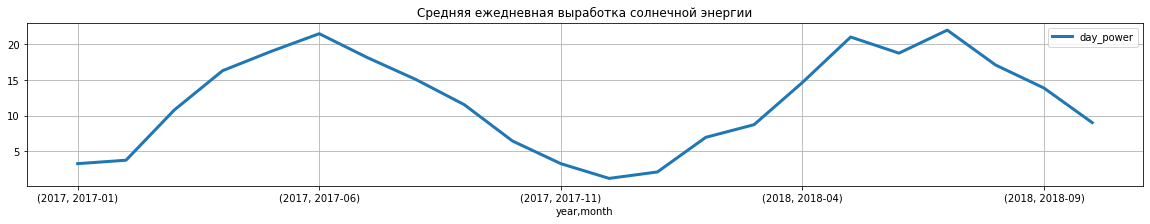

In [56]:
gr.plot(
    kind='line',
    figsize=(20, 3),
    title='Средняя ежедневная выработка солнечной энергии',
    grid = True,
    lw=3
);
